In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [7]:
# Load the dataset
data = pd.read_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\Finaldata_Adjusted_Income_Product_Ratio_Dataset_Cleaned.csv')

data = data.drop(columns=['Customer Name'])

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'], format='ISO8601')

# Calculate Average Purchase Value
# Group by 'Customer ID' to calculate metrics
customer_metrics = data.groupby('Customer ID').agg(
  total_revenue=('Total purchase amount', 'sum'),
  total_purchases=('Total purchase amount', 'count'),
  first_purchase=('Purchase Date', 'min'),
  last_purchase=('Purchase Date', 'max')
).reset_index()

# Calculate metrics
customer_metrics['average_purchase_value'] = customer_metrics['total_revenue'] / customer_metrics['total_purchases']
customer_metrics['customer_lifespan'] = (customer_metrics['last_purchase'] - customer_metrics['first_purchase']).dt.days

# Calculate Average Purchase Frequency
average_frequency = data['Customer ID'].nunique() / data.shape[0]
customer_metrics['average_purchase_frequency'] = average_frequency

# Calculate CLV
customer_metrics['CLV'] = (
  customer_metrics['average_purchase_value'] *
  customer_metrics['average_purchase_frequency'] *
  customer_metrics['customer_lifespan']
)

# Merge CLV back to the original dataset
data = data.merge(customer_metrics[['Customer ID', 'CLV']], on='Customer ID', how='left')

# Display the dataset with Customer Lifetime and CLV
print(data[['Customer ID', 'CLV']])

data['Purchase Date'] = data['Purchase Date'].astype('int64') / 10**9

# Display basic information and first few rows of the dataset to assess its structure
data_info = data.info()
data_head = data.head()

data_info, data_head

data.to_csv(r'C:\Cheynhen\Python\Dataset\e-commerce\ecom_with_clv.csv', index=False)

        Customer ID            CLV
0             46251   72019.889240
1             46251   72019.889240
2             46251   72019.889240
3             46251   72019.889240
4             13593  101832.034304
...             ...            ...
249995        33308       0.000000
249996        48835       0.000000
249997        21019       0.000000
249998        49234       0.000000
249999        16971       0.000000

[250000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  float64
 2   Product Category       250000 non-null  int64  
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total purchase amount  250000 non-null  int64  
 6   Payment Metho

In [3]:
inertia_values = []
K = range(1, 11)  # Testing from 1 to 10 clusters

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
  inertia_values.append(kmeans.inertia_)

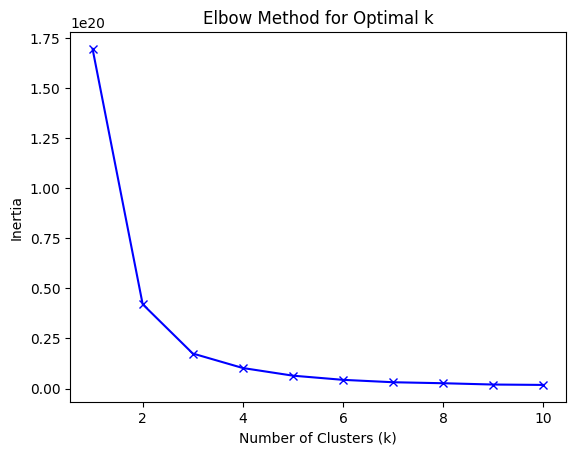

In [4]:
# Plotting the elbow curve
plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

k = 3 maybe?

In [5]:
n_clusters = 3
optimal_model = KMeans(n_clusters=n_clusters, max_iter=100, algorithm="lloyd", n_init=100, random_state=42).fit(data)
cluster_labels = optimal_model.predict(data)
labels = optimal_model.labels_

db_index = davies_bouldin_score(data, labels)
print(f"Davies-Bouldin Index: {db_index}")

pc_reduced = PCA(n_components=2, random_state=42).fit(data)

reduced_data = pc_reduced.transform(data)

Davies-Bouldin Index: 0.4600401556796099


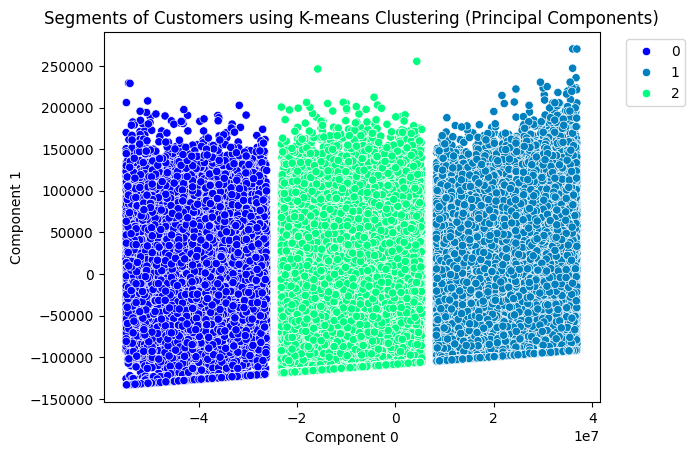

In [6]:
cmap = matplotlib.colormaps["winter"]

ax = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=cluster_labels, palette=cmap)
ax.set_title("Segments of Customers using K-means Clustering (Principal Components)")
ax.set_xlabel("Component 0")
ax.set_ylabel("Component 1")
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")